In [26]:
import sys
from pathlib import Path

try:                                   # regular .py execution
    repo_root = Path(__file__).resolve().parent.parent
except NameError:                      # Jupyter / IPython
    repo_root = Path().resolve().parent

sys.path.append(str(repo_root))
print("Added to sys.path →", repo_root)

Added to sys.path → /Users/joro/src/kth/thesis/jailbreaks


In [27]:
%load_ext autoreload
%autoreload 1
%aimport config, utils
from config import model_map, method_map 
from config import heat_map_font_sizes as font_sizes
from utils import heatmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from jailbreaks.pipeline.steps.aggregate import (
    AggregateConfig,
    aggregate
)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
                

In [29]:
datasets = [
    {"project_name": "advbench_v1", "eval_run_id": "deepseek-v1"},
    {"project_name": "malicious-instruct-v2", "eval_run_id": "deepseek-v1"},
]

dataset_map = {
    "advbench_v1": "AdvBench",
    "malicious-instruct-v2": "Malicious-Instruct",
    "combined": "Combined",
}

output_base_dir = "../results"

output_dir = Path(f"../report/figures/cost/inference")
fig_dir = Path(f"{output_dir}")
fig_dir.mkdir(parents=True, exist_ok=True)
table_dir = Path(f"{output_dir}/tables/")
table_dir.mkdir(parents=True, exist_ok=True)

In [30]:
metric_map = {
    "gen_time"        : {"name":"Inference Time", "unit":"s", "ylim":(0, 100)},
    "gen_time_per_char": {"name":"Inference Time per Character", "unit":"s", "ylim":(0, 100)},
}

percent_metrics = {
    m for m, props in metric_map.items() if props["unit"] == "%"
}

metrics = ["gen_time", "gen_time_per_char"]
table_metrics = metrics
all_metrics = metrics 


In [31]:
def mean_ci_table(
    df: pd.DataFrame,
    *,
    precision: int = 1,
    percent_metrics: set[str] | None = None,
    metric_map: dict[str, dict[str, str]] | None = None
) -> pd.DataFrame:
    percent_metrics = set(percent_metrics or [])
    out = pd.DataFrame(index=df.index)

    for metric in df.columns.get_level_values(0).unique():
        if ('mean' not in df[metric]) or ('ci_error' not in df[metric]):
            continue                                # skip incomplete metrics

        mean = df[(metric, 'mean')].copy()
        ci   = df[(metric, 'ci_error')].copy()

        if metric in percent_metrics:
            mean *= 100
            ci   *= 100

        out[metric] = (
            mean.round(precision).map(lambda x: f"{x:.{precision}f}")
            + " ± "
            + ci.round(precision).map(lambda x: f"{x:.{precision}f}")
        )
    if metric_map is not None:
        rename_dict = {
            metric: metric_map[metric]["name"] 
            for metric in out.columns 
            if metric in metric_map
        }
        out = out.rename(columns=rename_dict)

    # put the columns in alphabetical order by metric for prettier output
    out = out.reindex(sorted(out.columns), axis=1)
    return out

In [32]:
from scipy.stats import norm
import numpy as np

alpha = 0.05
z = norm.ppf(1 - alpha/2)

def ci_error(series):
    return z * series.std(ddof=1) / np.sqrt(series.count())
ci_error.__name__ = 'ci_error'

2025-06-04 01:56:55,600 - jailbreaks.pipeline.steps.aggregate - INFO - Step 4: Aggregating results from
2025-06-04 01:56:55,603 - jailbreaks.pipeline.utils - INFO - Processing benchmark: advbench-300t
2025-06-04 01:56:55,603 - jailbreaks.pipeline.utils - INFO -   Processing model: phi-4
2025-06-04 01:56:55,604 - jailbreaks.pipeline.utils - INFO -     Processing method combo: outputaware-temperature
2025-06-04 01:56:55,604 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: deepseek-v1
2025-06-04 01:56:55,605 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/outputaware-temperature/deepseek-v1/evaluation_responses-cb736b77.csv
2025-06-04 01:56:55,657 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/outputaware-temperature/deepseek-v1/evaluation_responses-6e233dd9.csv
2025-06-04 01:56:55,674 - jailbreaks.pipeline.utils - INF


=== Processing advbench_v1 ===


2025-06-04 01:56:55,780 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/prefixinjection-3/deepseek-v1/evaluation_responses-e5712d0c.csv
2025-06-04 01:56:55,802 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/prefixinjection-3/deepseek-v1/evaluation_responses-c2f77d29.csv
2025-06-04 01:56:55,814 - jailbreaks.pipeline.utils - INFO -     Processing method combo: baseline
2025-06-04 01:56:55,815 - jailbreaks.pipeline.utils - INFO -       Processing evaluator: deepseek-v1
2025-06-04 01:56:55,816 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek-v1/evaluation_responses-cb736b77.csv
2025-06-04 01:56:55,833 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/advbench_v1/evaluations/deepseek-v1/advbench-300t/phi-4/baseline/deepseek


=== Processing malicious-instruct-v2 ===


2025-06-04 01:56:59,289 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Llama-3.1-8B-Instruct/hiddenlayerinjection/deepseek-v1/evaluation_responses-b58e5faf.csv
2025-06-04 01:56:59,296 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Llama-3.1-8B-Instruct/hiddenlayerinjection/deepseek-v1/evaluation_responses-86188500.csv
2025-06-04 01:56:59,302 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Llama-3.1-8B-Instruct/hiddenlayerinjection/deepseek-v1/evaluation_responses-b056a7bc.csv
2025-06-04 01:56:59,311 - jailbreaks.pipeline.utils - INFO -         Loading file: ../results/malicious-instruct-v2/evaluations/deepseek-v1/malicious-300t/Llama-3.1-8B-Instruct/hiddenlayerinjection/deepseek-v1/evaluation_responses-f12df643.csv
2025-06-04 01:56:59,316 


=== Creating Combined Dataset ===

=== Analyzing advbench_v1 ===
Saved safety metrics table for advbench_v1

=== Analyzing malicious-instruct-v2 ===
Saved safety metrics table for malicious-instruct-v2

=== Analyzing combined ===
Saved safety metrics table for combined


2025-06-04 01:57:01,336 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30bb0f950>



=== Generating plots for advbench_v1 ===


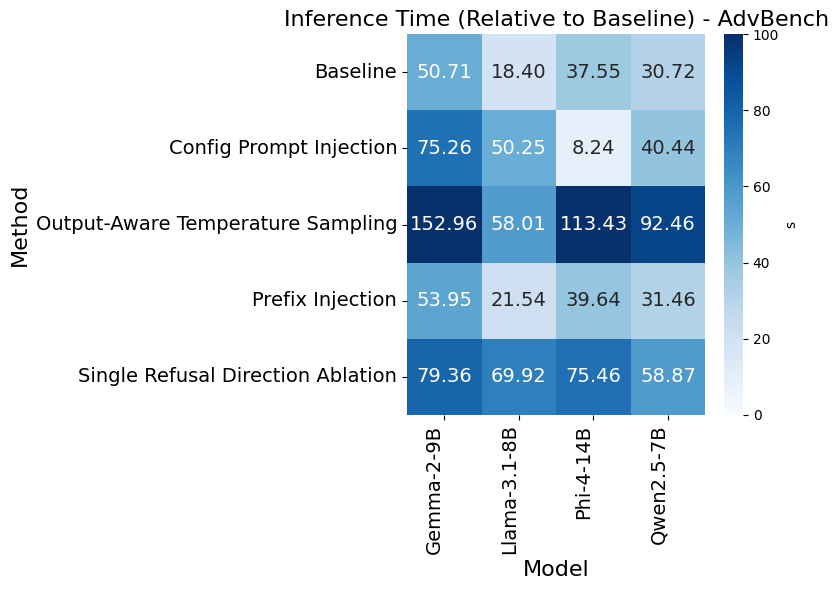

2025-06-04 01:57:02,545 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30bc37950>


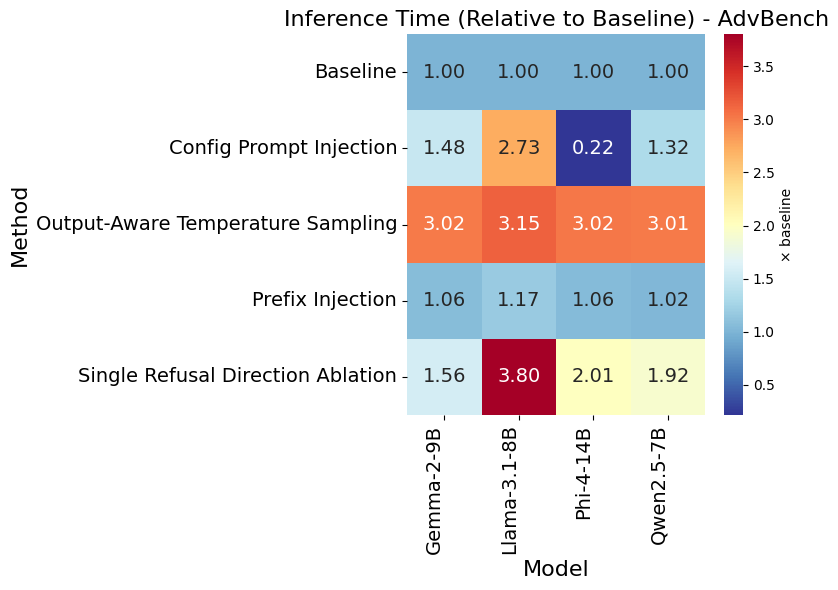

2025-06-04 01:57:02,812 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30bed4750>


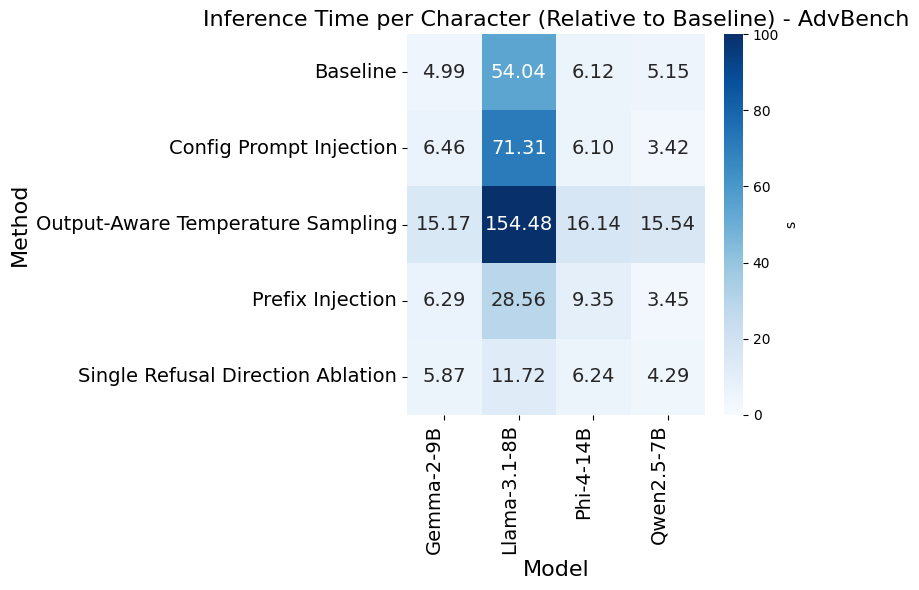

2025-06-04 01:57:03,041 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x324cc86d0>


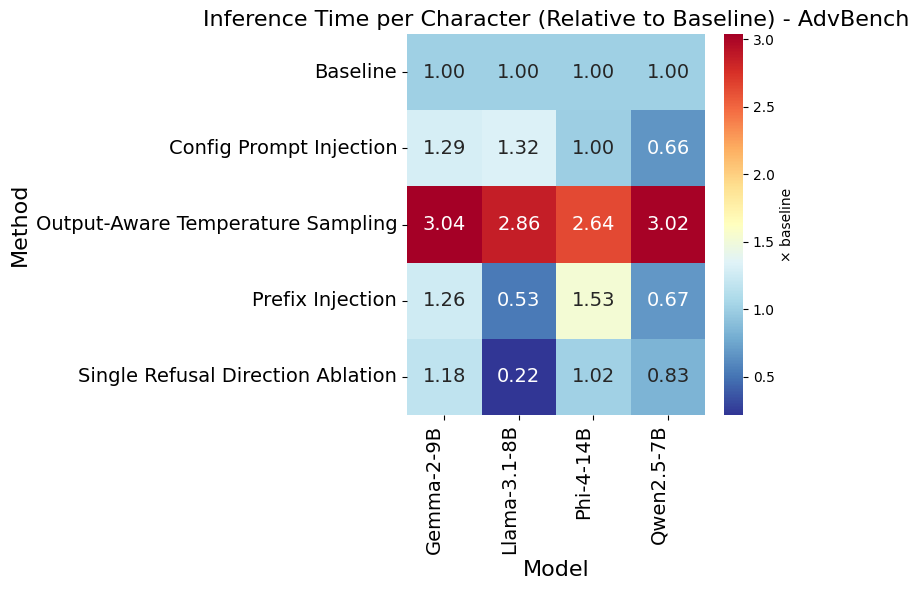

2025-06-04 01:57:03,268 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x312563b90>



=== Generating plots for malicious-instruct-v2 ===


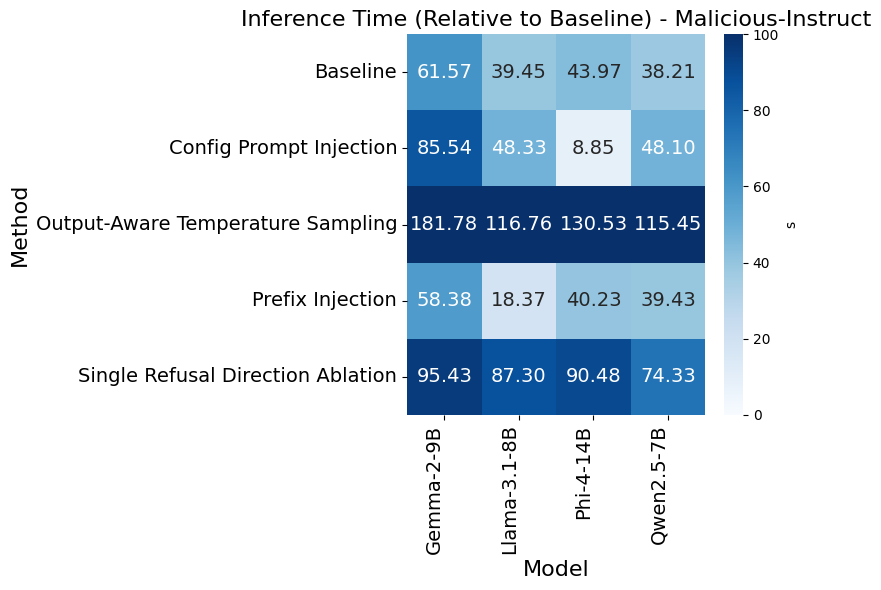

2025-06-04 01:57:03,497 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30bc6a850>


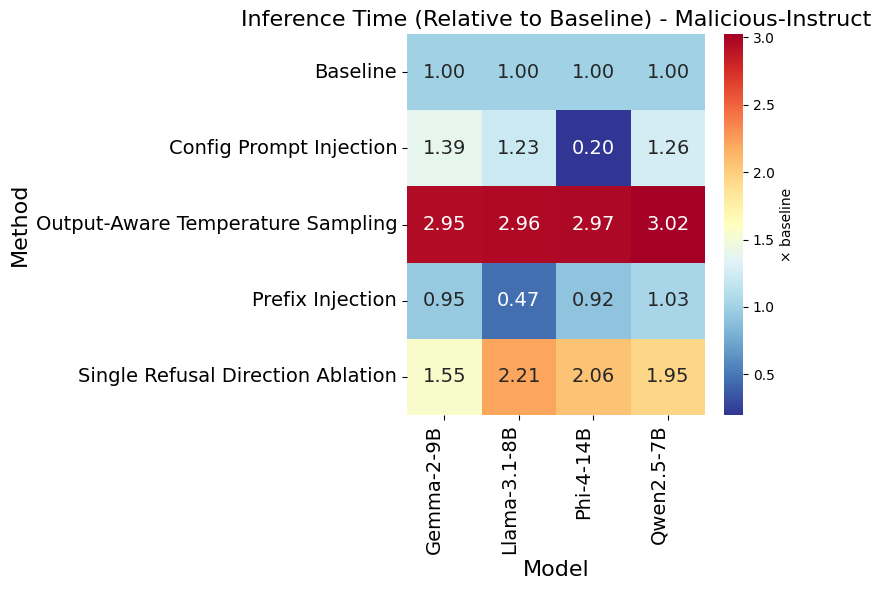

2025-06-04 01:57:03,714 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x312605590>


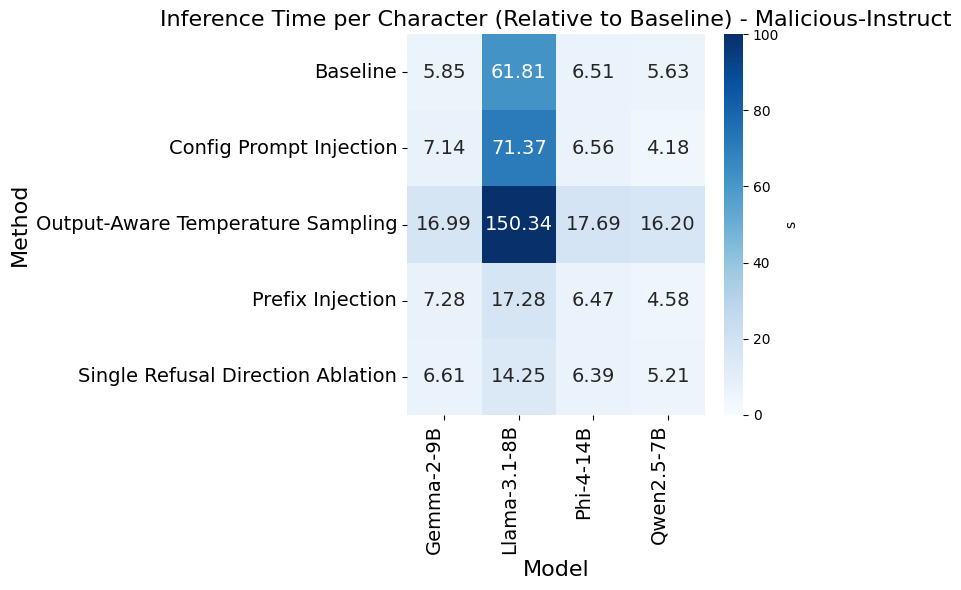

2025-06-04 01:57:03,961 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30b44a850>


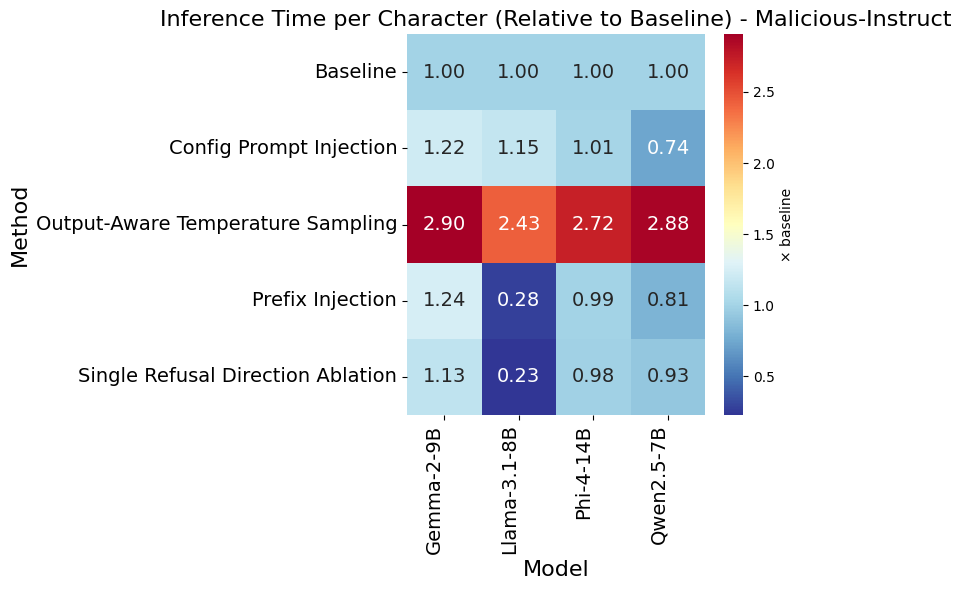

2025-06-04 01:57:04,184 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x31225af90>



=== Generating plots for combined ===


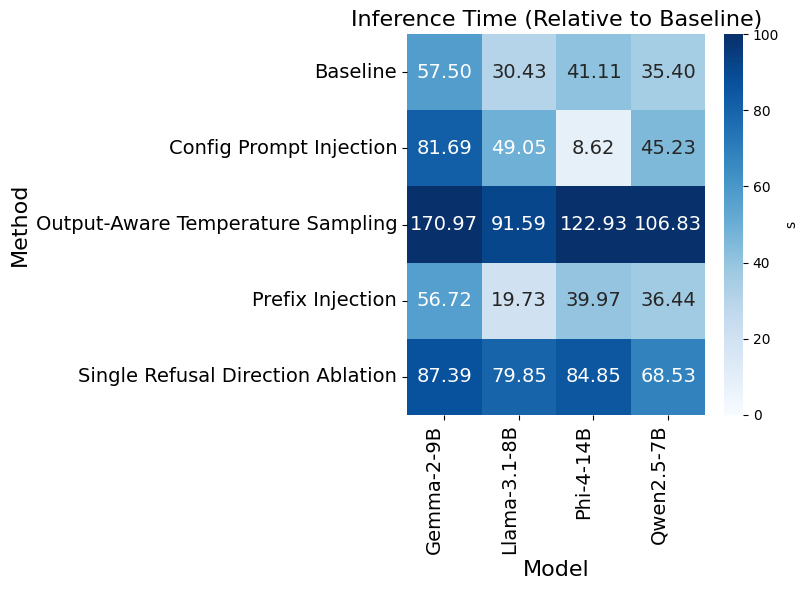

2025-06-04 01:57:04,384 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30eedefd0>


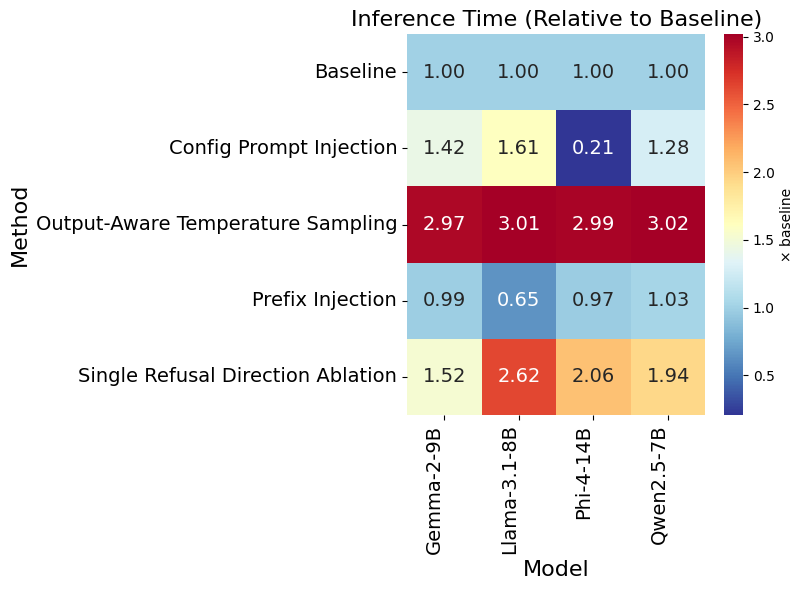

2025-06-04 01:57:04,604 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30eaaa890>


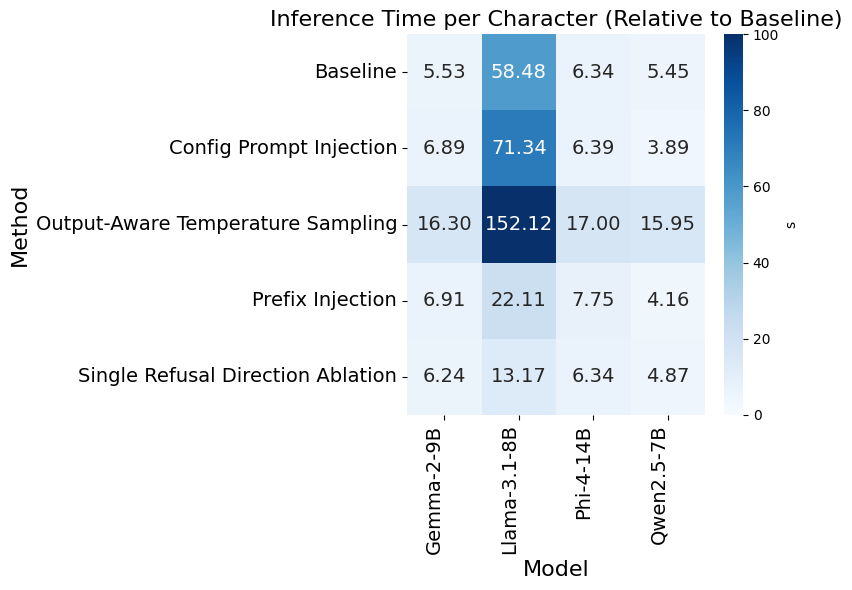

2025-06-04 01:57:04,821 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x30b209110>


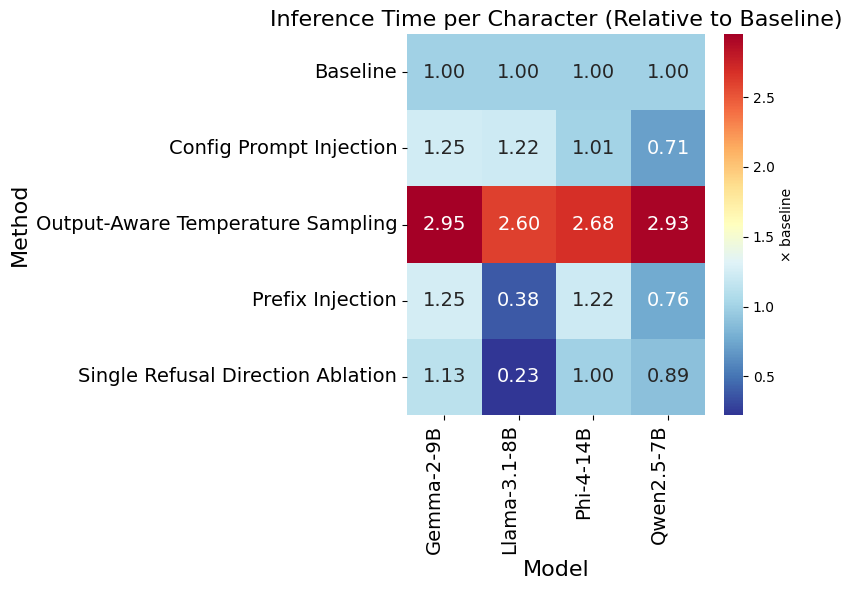


=== Analysis Complete ===
Generated results for:
  - advbench_v1
  - malicious-instruct-v2
  - combined


In [33]:
# Store results for each dataset and combined
all_aggregated_results = {}
all_configs = {}

# Process each dataset individually
for dataset in datasets:
    project_name = dataset["project_name"]
    eval_run_id = dataset["eval_run_id"]
    
    print(f"\n=== Processing {project_name} ===")
    
    output_dir = Path(f"{output_base_dir}/{project_name}")
    responses_dir = output_dir / "responses"
    evaluations_dir = output_dir / f"evaluations/{eval_run_id}"
    aggregated_results_dir = output_dir / f"aggregated_results/{eval_run_id}"
    
    config = AggregateConfig(
        project_name=project_name,
        responses_dir=responses_dir,
        evaluations_dir=evaluations_dir,
        output_dir=aggregated_results_dir,
        eval_run_id=eval_run_id,
        use_local=True
    )
    
    aggregated_results = aggregate(config)
    
    aggregated_results['gen_time_per_char'] = aggregated_results['gen_time'] / aggregated_results['response'].str.len() * 100

    # Store results    
    all_aggregated_results[project_name] = aggregated_results
    all_configs[project_name] = config

# Create combined dataset
print(f"\n=== Creating Combined Dataset ===")
combined_results = pd.concat([
    df.assign(dataset=name) for name, df in all_aggregated_results.items()
], ignore_index=True)

all_aggregated_results["combined"] = combined_results

# Process each dataset (including combined)
dataset_results = {}

for dataset_name, aggregated_results in all_aggregated_results.items():
    print(f"\n=== Analyzing {dataset_name} ===")
    
    # Calculate run means
    run_means = aggregated_results.groupby(['method', 'model', 'run_id']).agg({
        **{metric: 'mean' for metric in metrics},
    })
    
    run_means = run_means.rename(index=method_map, level="method")
    run_means = run_means.rename(index=model_map, level="model")
    
    grouped_df = run_means.groupby(['method', 'model']).agg({
        **{metric: ['mean', 'std', 'count', ci_error] for metric in all_metrics},
    })
    grouped_df = grouped_df.rename(index=method_map, level="method")
    
    method_df = run_means.groupby(['method']).agg({
        **{metric: ['mean', 'std', 'count', ci_error] for metric in all_metrics},
    })
    method_df = method_df.rename(index=method_map)
    
    # Store results
    dataset_results[dataset_name] = {
        'aggregated_results': aggregated_results,
        'run_means': run_means,
        'grouped_df': grouped_df,
        'method_df': method_df
    } 
    grouped_df_table = grouped_df.loc[:, table_metrics]
    
    pretty_model_table = mean_ci_table(grouped_df_table, 
                                       precision=1,
                                       percent_metrics=percent_metrics,
                                       metric_map=metric_map,
                                       )
    
    latex_table = pretty_model_table.to_latex(escape=False)
    
    with open(f"{table_dir}/inference_metrics_{dataset_name}.tex", "w", encoding="utf-8") as f:
        f.write(latex_table)
    
    print(f"Saved safety metrics table for {dataset_name}")
for dataset_name, results in dataset_results.items():
    print(f"\n=== Generating plots for {dataset_name} ===")
    
    grouped_df = results['grouped_df']
    method_df = results['method_df']
    
    # Create dataset-specific figure directory
    dataset_fig_dir = fig_dir / dataset_name
    dataset_fig_dir.mkdir(parents=True, exist_ok=True)
    
    # Generate heatmaps
    _metrics = pd.Index(all_metrics)
    for metric in _metrics:
        transformation = 1 if metric == "depth" else 100
        # Generate regular heatmap
        heatmap(
            grouped_df,
            metric,
            "mean",
            cmap="Blues",
            transformation=transformation,
            fig_dir=dataset_fig_dir,
            title = f"{metric_map[metric]['name']} (Relative to Baseline)" + (f" - {dataset_map[dataset_name]}" if dataset_name != "combined" else ""),
            unit=metric_map[metric]["unit"],
            ylim=metric_map[metric]["ylim"],
            font_sizes=font_sizes
        )
        
        # Generate normalized heatmap (relative to baseline)
        heatmap(
            grouped_df,
            metric,
            "mean",
            cmap="RdYlBu_r",  # Different colormap for normalized view
            transformation=1,
            fig_dir=dataset_fig_dir,
            title = f"{metric_map[metric]['name']} (Relative to Baseline)" + (f" - {dataset_map[dataset_name]}" if dataset_name != "combined" else ""),
            unit="× baseline",
            ylim=None,  # Let it auto-scale
            font_sizes=font_sizes,
            normalize_by_baseline=True
        )

    
print("\n=== Analysis Complete ===")
print("Generated results for:")
for dataset_name in dataset_results.keys():
    print(f"  - {dataset_name}")